In [ ]:
% cd /content/drive/MyDrive/DAUGXray/YOLOv5_train_config/

/content/drive/MyDrive/DAUGXray/YOLOv5_train_config


# 1.Environment Setup

## 1.1 Clone the YOLOv5 repository

In [ ]:
!git clone https://github.com/ultralytics/yolov5
% cd yolov5

## 1.2 Install libraries in requirements.txt 

In [ ]:
%pip install -U -r ./requirements.txt
%pip install wandb -qr requirements.txt  # install dependencies

# 2.Prepare for training

- For more information see the [Train Custom Data Tutorial](https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data)

## Create yaml file config 

- Train config yaml file could be like this

```
# parameters
nc: 1  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [116,90, 156,198, 373,326]  # P5/32
  - [30,61, 62,45, 59,119]  # P4/16
  - [10,13, 16,30, 33,23]  # P3/8

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
  ]

# YOLOv5 head
head:
  [[-1, 3, BottleneckCSP, [1024, False]],  # 9

   [-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],
   [-1, 1, nn.Conv2d, [na * (nc + 5), 1, 1]],  # 18 (P3/8-small)

   [-2, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],
   [-1, 1, nn.Conv2d, [na * (nc + 5), 1, 1]],  # 22 (P4/16-medium)

   [-2, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],
   [-1, 1, nn.Conv2d, [na * (nc + 5), 1, 1]],  # 26 (P5/32-large)

   [[], 1, Detect, [nc, anchors]],  # Detect(P5, P4, P3)
  ]
```

- Data yaml file could be like this

```
train: "/path/to/your/train/dataset/"
val: "/path/to/your/val/dataset/"

# number of classes
nc: 1 # only detect bone-fracture

# class names
names: ['fracture']
```

# 3.Train

YOLOv5 includes 4 versions:
- yolov5-s which is a small version
- yolov5-m which is a medium version
- yolov5-l which is a large version
- yolov5-x which is an extra-large version

To train with YOLOv5 run this command:
```
!python train.py --img 640 --batch 16 --epochs 100 --data your_data_yaml_file.yaml --cfg your_train_yaml_file.yaml --weights yolov5s.pt --name tutorial --nosave --cache --device 0 
```


In [ ]:
# !python ./train.py --img 640 --batch 16 --epochs 100 --data /content/drive/MyDrive/DAUGXray/YOLOv5_train_config/data.yaml --cfg /content/drive/MyDrive/DAUGXray/YOLOv5_train_config/train.yaml --weights yolov5s.pt --name tutorial --nosave --cache --device 0 
!python ./train.py --img 640 --batch 16 --epochs 1000 --data /content/drive/MyDrive/DAUGXray/YOLOv5_train_config/data.yaml --weights yolov5s.pt --name tutorial --nosave --cache --device 0 

# 4.Visualize

## Using Weights and biases (wandb)

- Looking for more details [here](https://github.com/ultralytics/yolov5/issues/1289)
- W&B will prompt you to create a new account. Afterwards you are given an API key (you can retrieve your key from https://wandb.ai/authorize), and then this key is used to tell W&B where to log your data. You only need to supply your key once, and then it is remembered on the same device.
- Below is result after 100 epochs

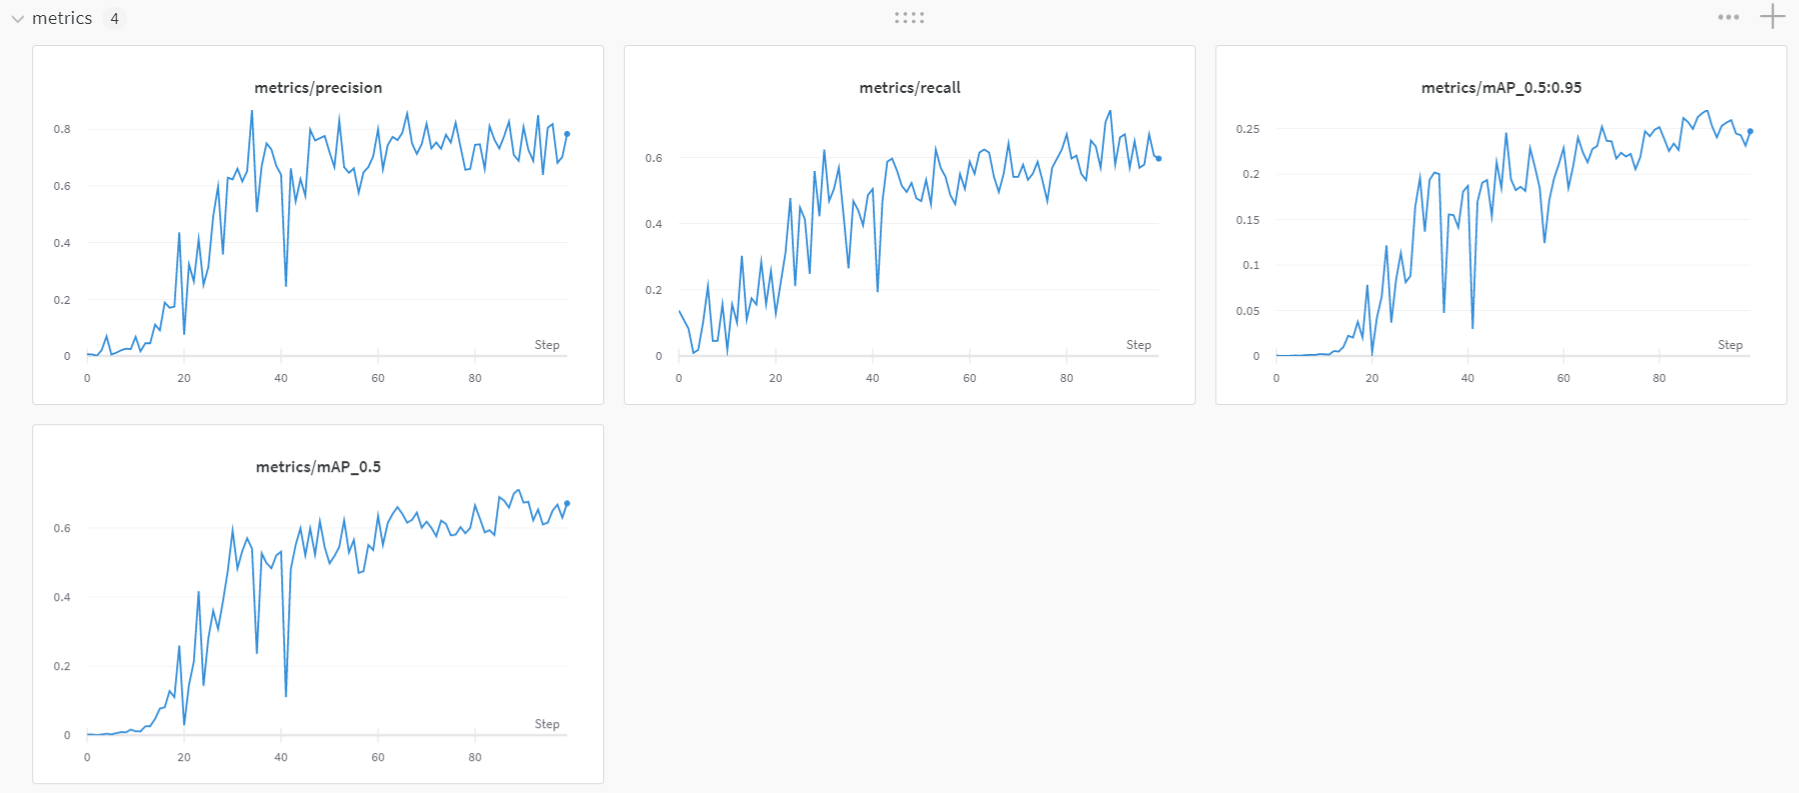

##  Local Logging

- All results are saved by default to runs/train
- Training losses and performance metrics are also logged to Tensorboard and a custom results.txt logfile which is plotted as results.png (below) after training completes.

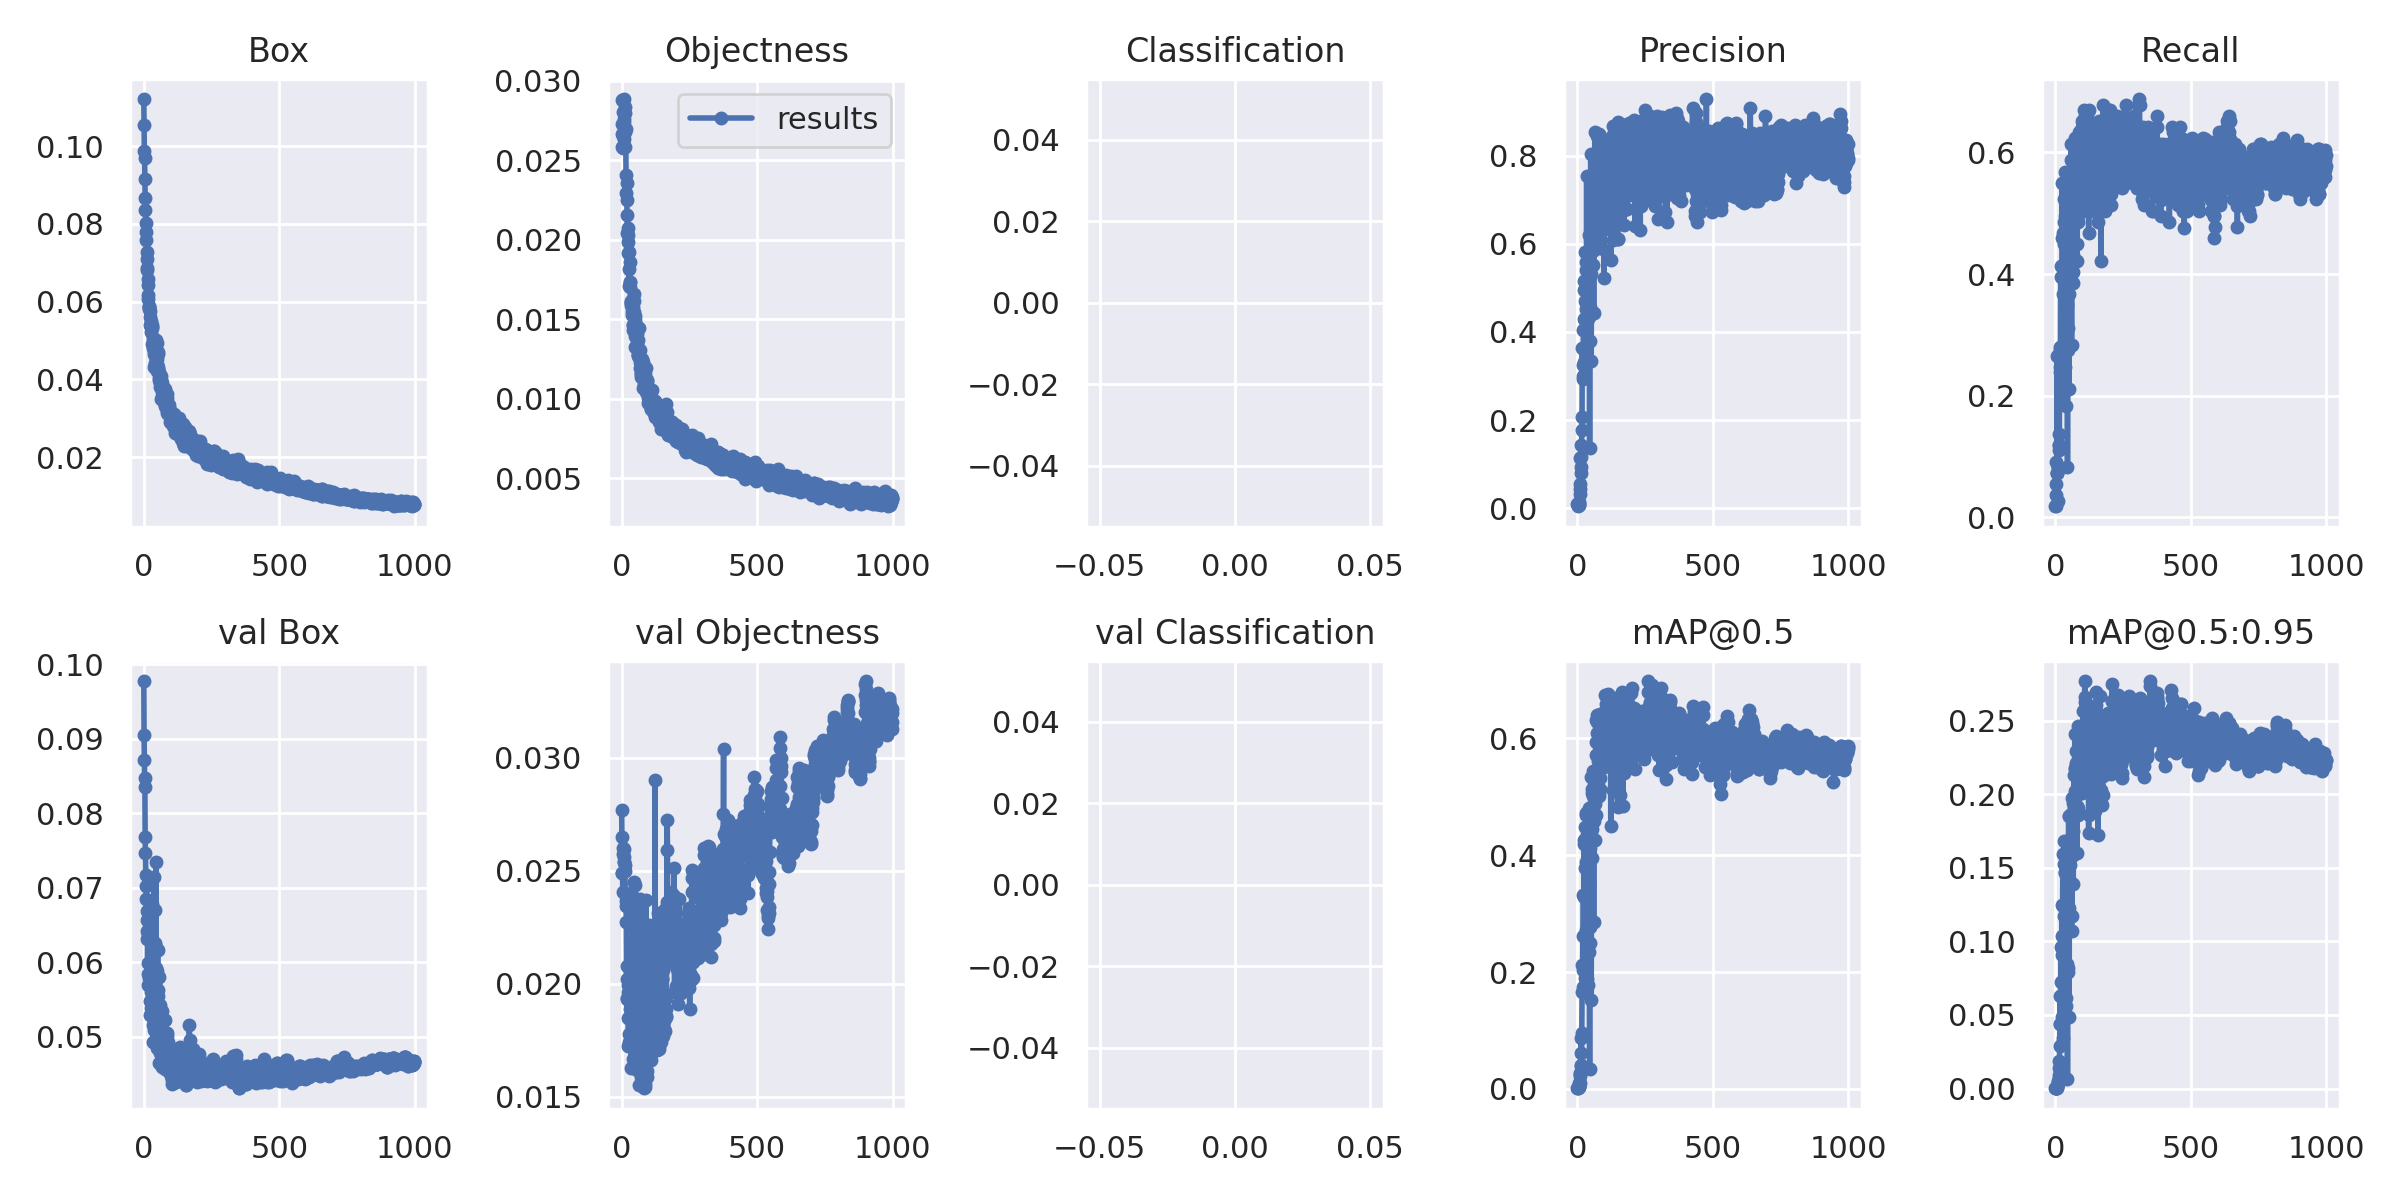

In [ ]:
from utils.plots import plot_results 
from IPython.display import Image, clear_output  # to display images

# plot_results(save_dir='runs/train/tutorial')  # plot all results*.txt as results.png
Image(filename='runs/train/tutorial/results.png', width=4000)

# 5.Predict

To Predict you run a command like this:
- weights can be found in runs/train
- source is the path_predict 

```
!python detect.py --weights path/to/your/train/checkpoint --img 416 --conf 0.4 --source path/to/your/test/img/folder/
```

In [ ]:
!python detect.py --weights /content/drive/MyDrive/DAUGXray/YOLOv5_train_config/yolov5/runs/train/tutorial/weights/last.pt --img 640 --conf 0.4 --source /content/drive/.shortcut-targets-by-id/1KRO0jiU_OsGlq6VUOkzTCwV8D9i7QAln/Data\ Augmentation-XrayImg/original/dataDetect_test/

- See the output images [here](https://drive.google.com/file/d/1JQoWrPJbGYuGZ1jWkYcJPe1G7ivnqvvX/view?usp=sharing)

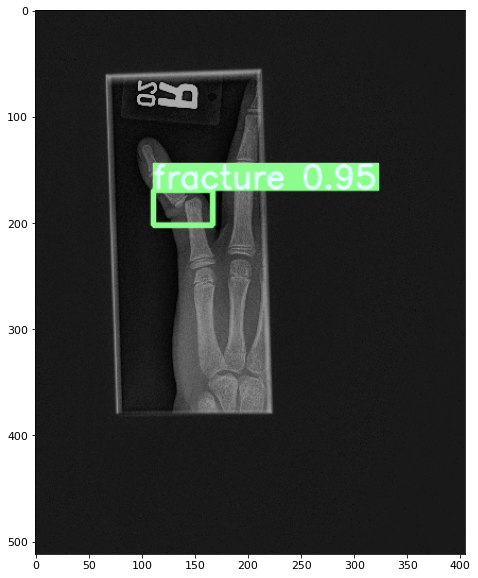

In [ ]:
import random 
import matplotlib.pyplot as plt
import cv2

OUTPUT_FOLDER = "/content/drive/MyDrive/DAUGXray/YOLOv5_train_config/yolov5/runs/detect/exp3"
list_image_path = os.listdir(OUTPUT_FOLDER)
predict_index = random.randint(0,len(list_image_path)-1)
path_predict = os.path.join(OUTPUT_FOLDER,  list_image_path[predict_index])
image = cv2.imread(path_predict)
plt.figure(figsize = (20,10))
plt.imshow(image)
plt.show()